In [144]:
import gaiaxpy as gxp
import matplotlib.pyplot as plt
import os
import pandas as pd
import sdss

from astroML.sum_of_norms import sum_of_norms, norm
from astroquery.sdss import SDSS as aq_sdss

In [160]:
# data-relevant constants
DF = pd.read_csv('../data/gaia_sdss_joined.csv')
FIGURE_PATH = '../figures'

GAIA_ID_COLNAME = 'source_id'
SDSS_ID_COLNAME = 'specObjId'
NUM_NORMS = 800

In [161]:
# plot fontsize settings

SMALL_FONT_SIZE = 12
MEDIUM_FONT_SIZE = 16
LARGE_FONT_SIZE = 18

plt.rc('font', size=SMALL_FONT_SIZE)          # default text sizes
plt.rc('axes', titlesize=LARGE_FONT_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_FONT_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_FONT_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_FONT_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_FONT_SIZE)    # legend fontsize
plt.rc('figure', titlesize=LARGE_FONT_SIZE)   # fontsize of the figure title

In [162]:
def plot_gaia(gaia_id):
    try:
        sdss_id = DF.loc[DF[GAIA_ID_COLNAME] == gaia_id][SDSS_ID_COLNAME].to_list()[0]
    except:
        print('Could not find an SDSS ID corresponding to the provided Gaia ID')
    else:
        plot(gaia_id, sdss_id)
    
def plot_sdss(sdss_id):
    try:
        gaia_id = DF.loc[DF[SDSS_ID_COLNAME] == sdss_id][GAIA_ID_COLNAME].to_list()[0]
    except:
        print('Could not find an Gaia ID corresponding to the provided SDSS ID')
    else:
        plot(gaia_id, sdss_id)
    
def plot(gaia_id, sdss_id):
    gaia_flux, gaia_sampling = gxp.calibrate([gaia_id])
    
    gaia_flux = gaia_flux['flux'][0]
    gaia_sampling = gaia_sampling
    
    sp = sdss.SpecObj(int(sdss_id))
    data = aq_sdss.get_spectra(plate=sp.plate, mjd=sp.mjd, fiberID=sp.fiberID)
    
    spec_data = data[0][1].data

    sdss_sampling = 10 ** spec_data['loglam'] / 10  # Convert log wavelength to linear and Å to nm
    sdss_flux = spec_data['flux'] * 1e-19 # Convert SDSS units (1e-17 in cgs) to Gaia units (SI)

    w_best, rms, locs, widths = sum_of_norms(sdss_sampling, sdss_flux, NUM_NORMS,
                                             spacing='linear',
                                             full_output=True)

    norms = w_best * norm(sdss_sampling[:, None], locs, widths)

    # plot the results

    plt.figure(figsize=(20, 10))
    plt.plot(sdss_sampling, sdss_flux, color='#FFAAAA', ls='--', lw=1, label='SDSS flux')
    plt.plot(sdss_sampling, norms.sum(1), color='#FF4444', ls='-', lw=2, label='Gaussian fit to SDSS flux')
    plt.plot(gaia_sampling, gaia_flux, color='#4444FF', ls='-', lw=2, label='Gaia flux')

    plt.legend(loc=0)

    plt.text(0.97, 0.8, f"rms error = {rms:.2}",ha='right', va='top', transform=plt.gca().transAxes)
    plt.title(f"Gaia source_id {gaia_id}\n SDSS specObjId {sdss_id}")
    
    plt.xlabel('$\\lambda$ [nm]')
    plt.ylabel('flux [W m$^{-2}$ nm$^{-1}$]')
    
    plt.xlim(350, 950)
    
    if not os.path.exists(FIGURE_PATH):
        os.mkdir(FIGURE_PATH)

    plt.savefig(f'{FIGURE_PATH}/gaia_{gaia_id}_sdss_{sdss_id}.png')
    plt.show()

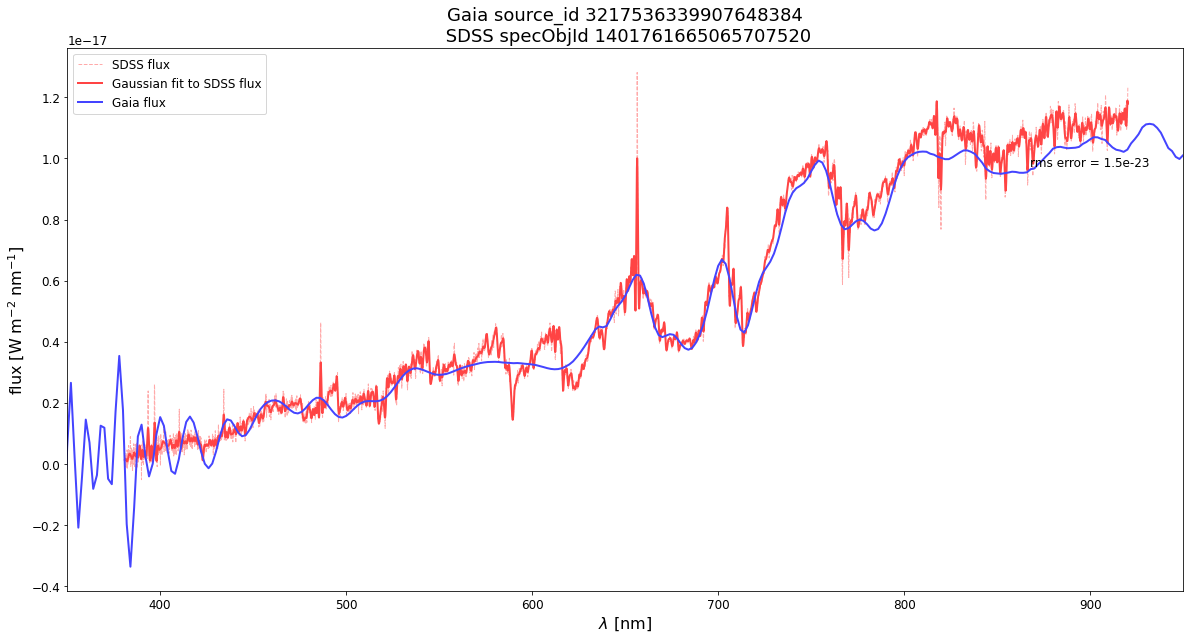

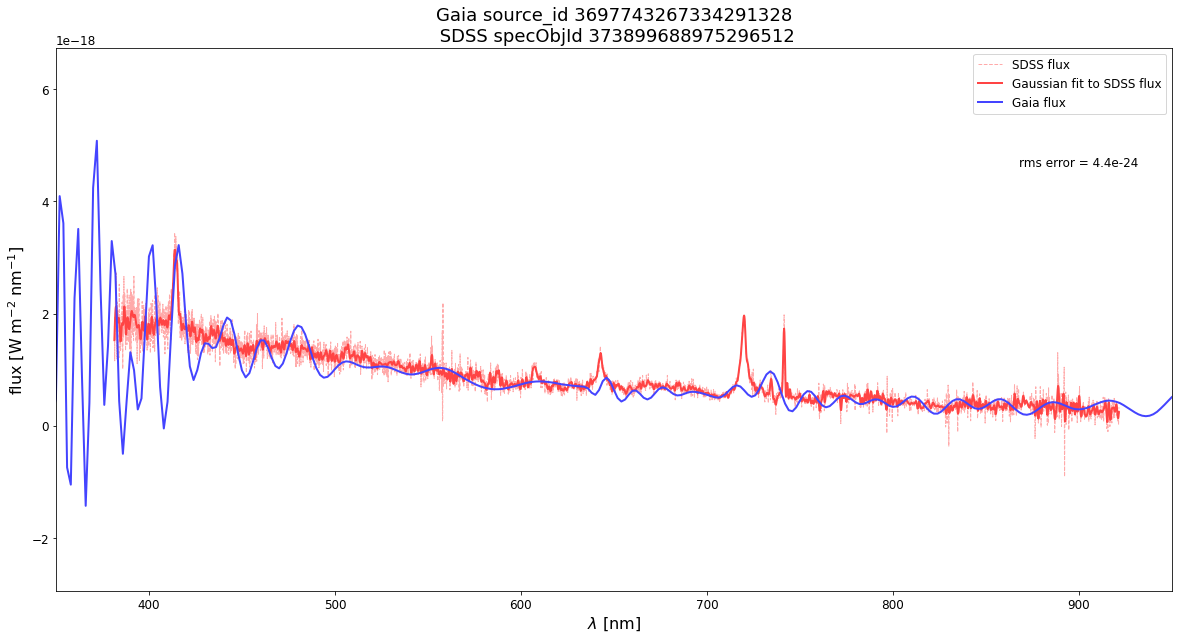

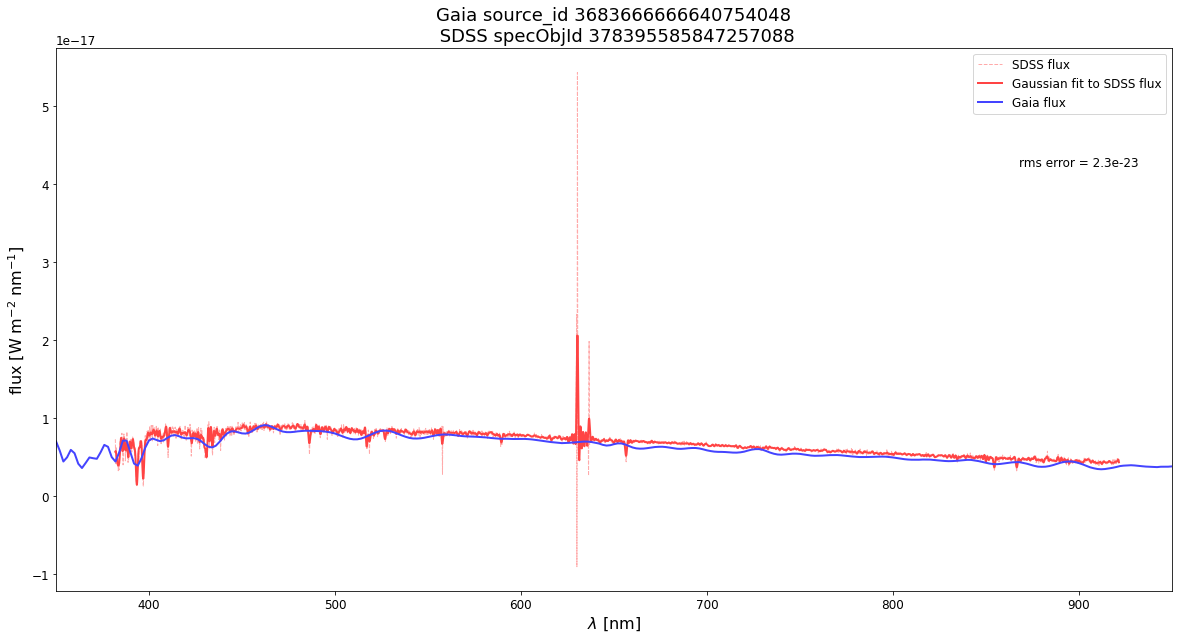

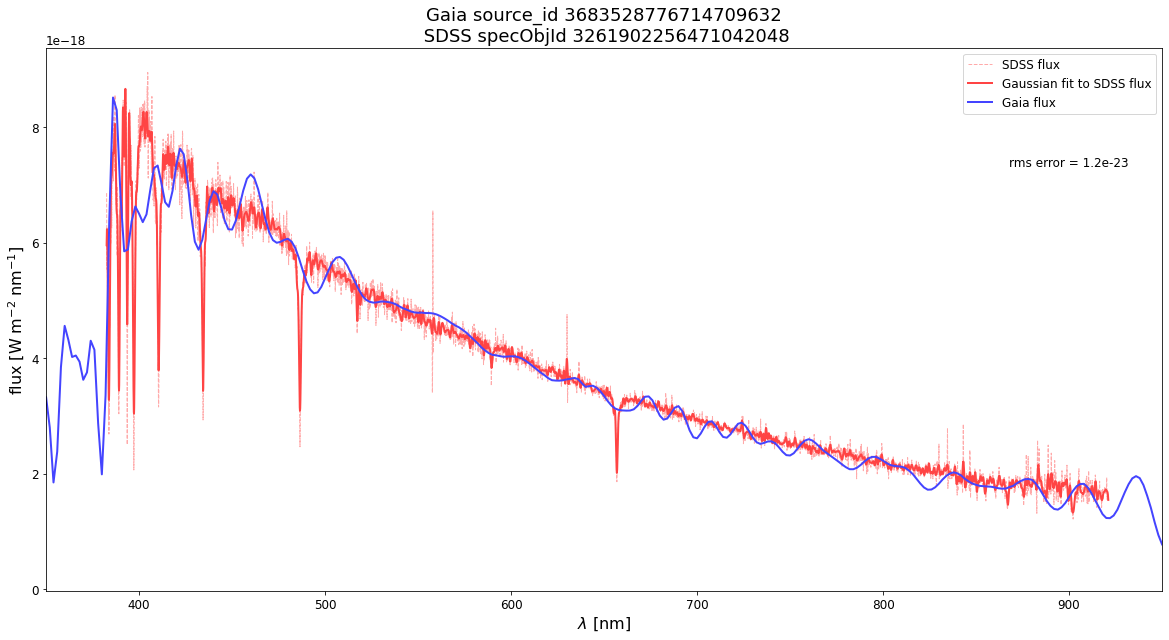

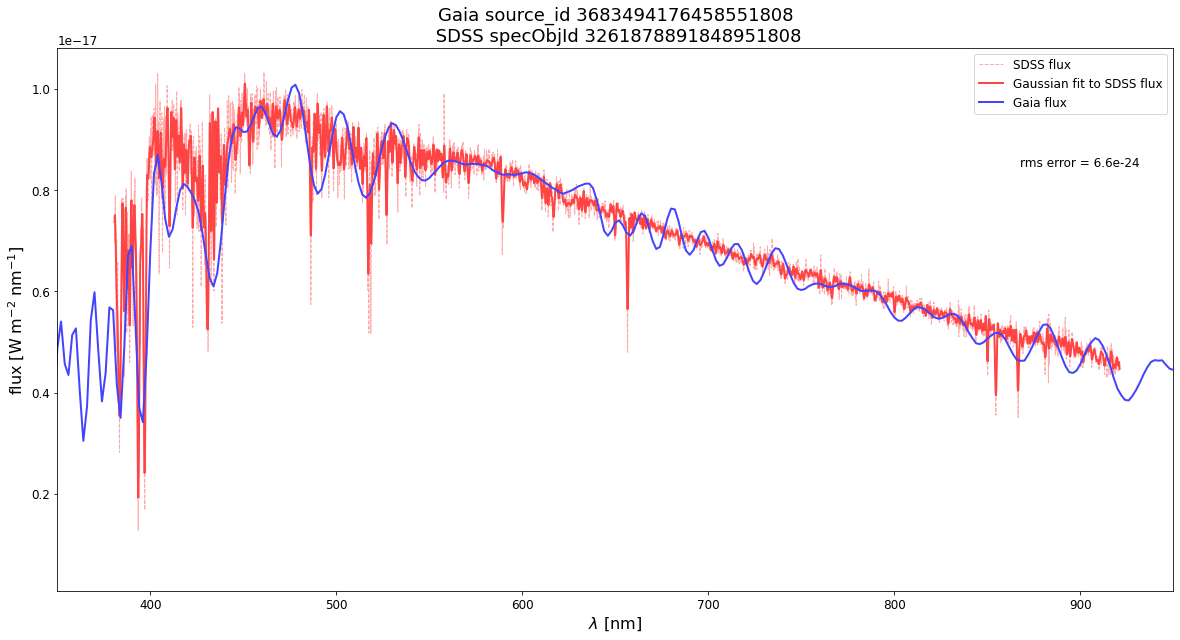

/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


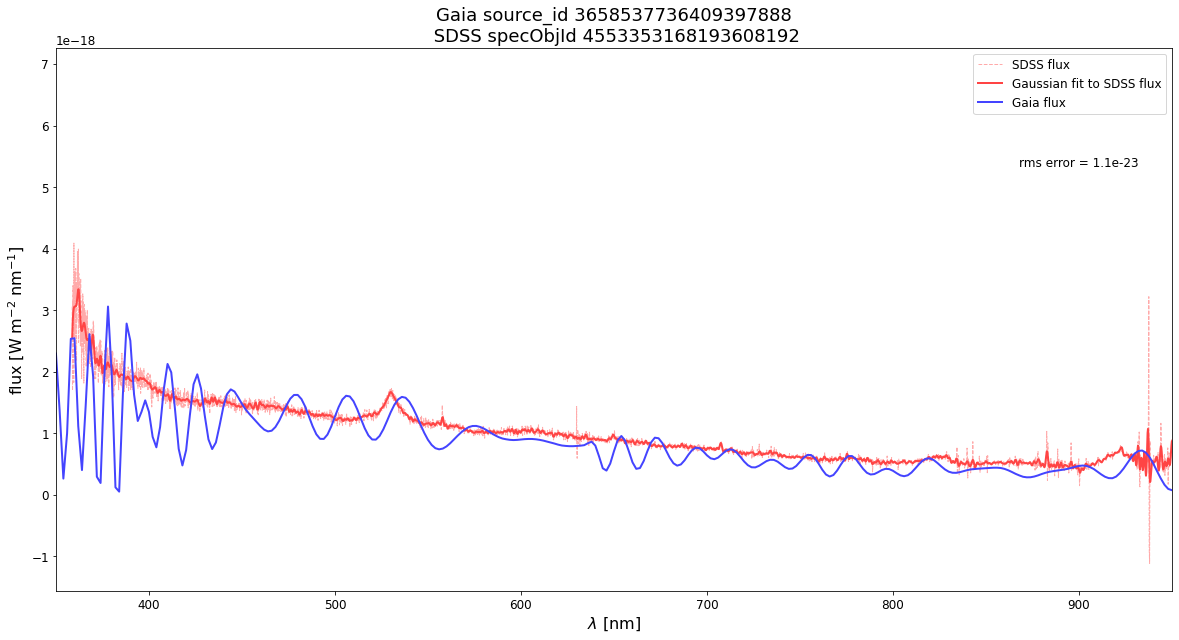

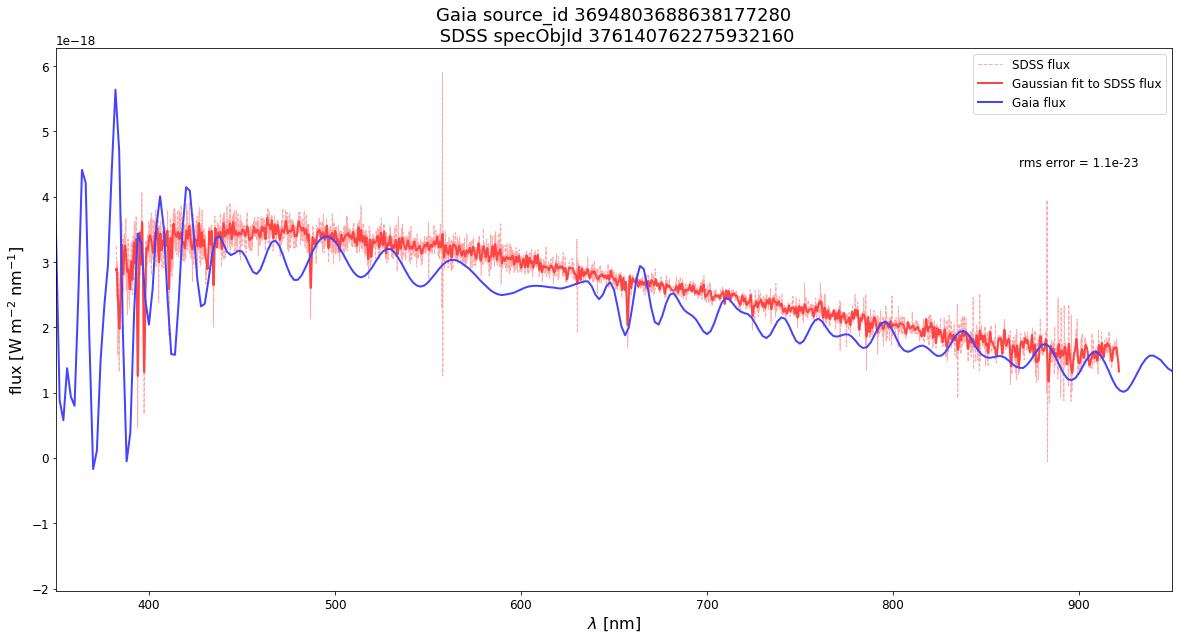

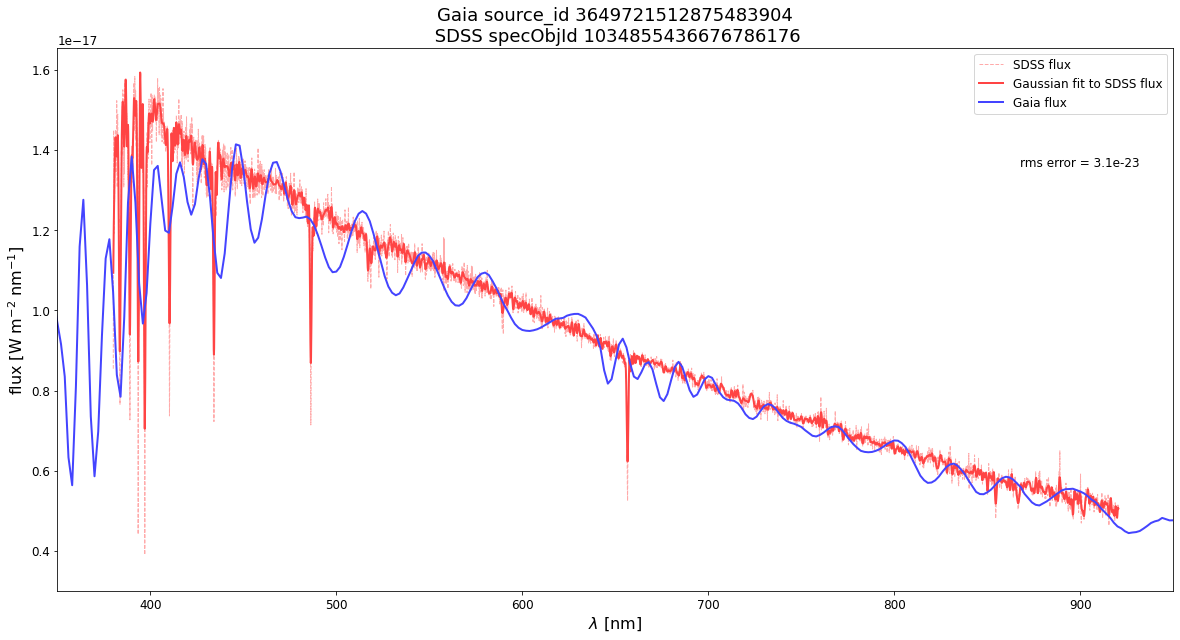

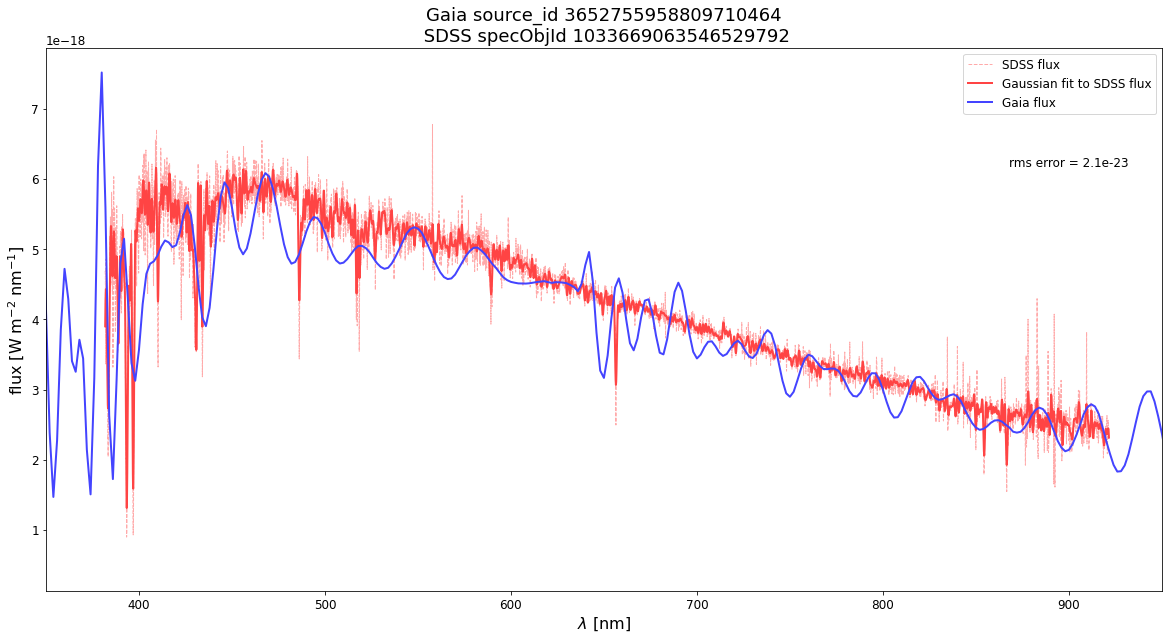

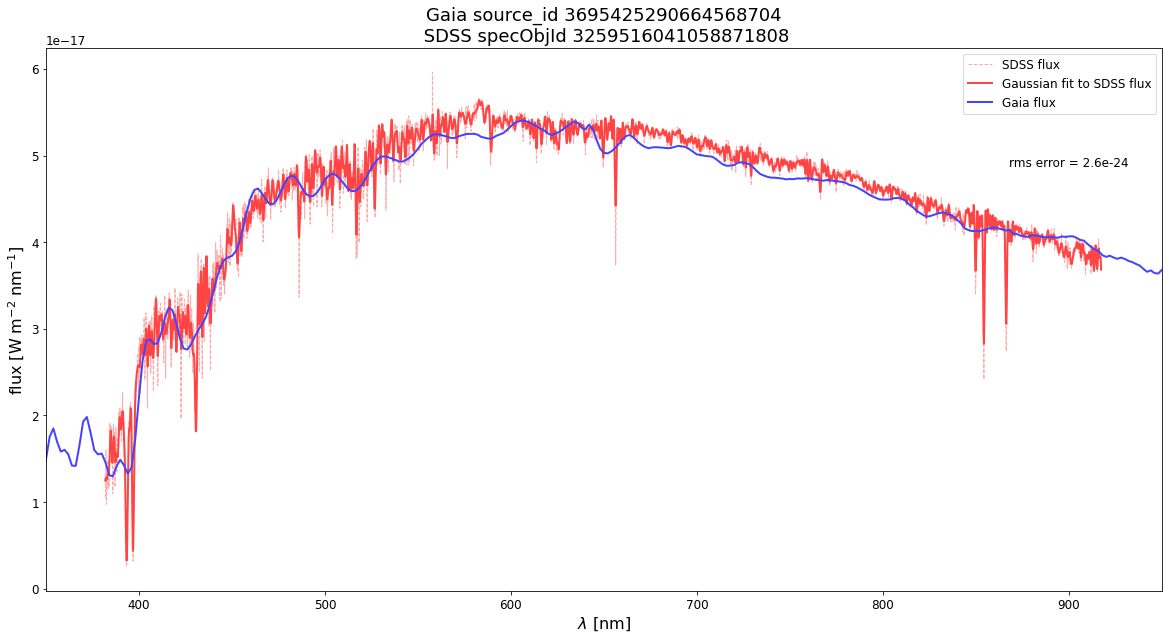

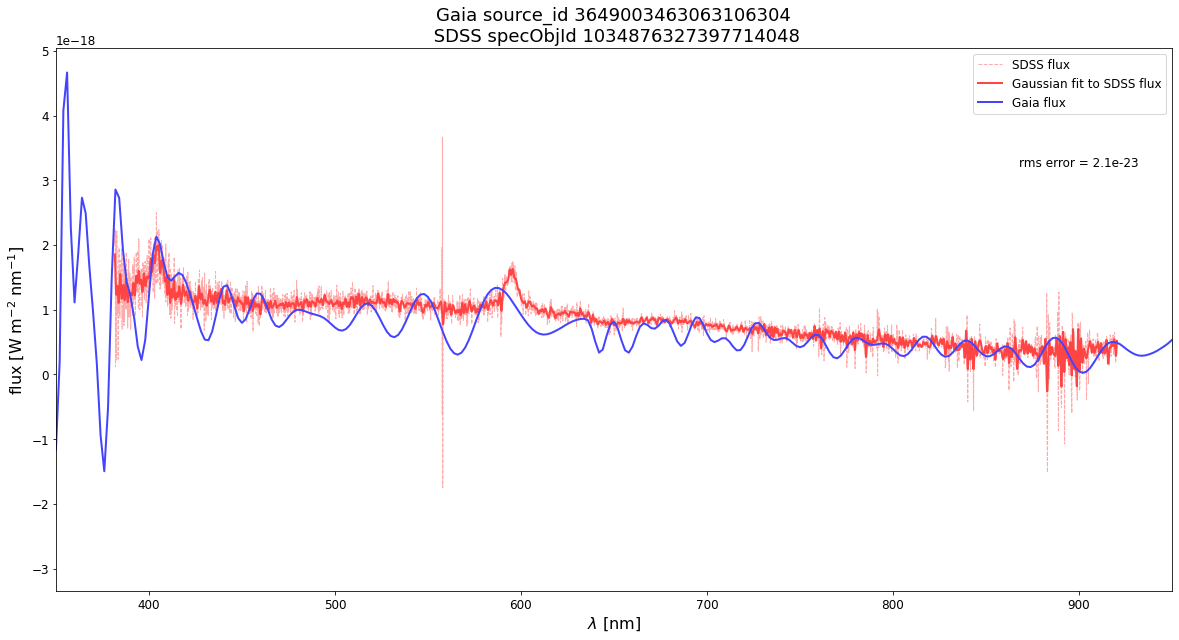

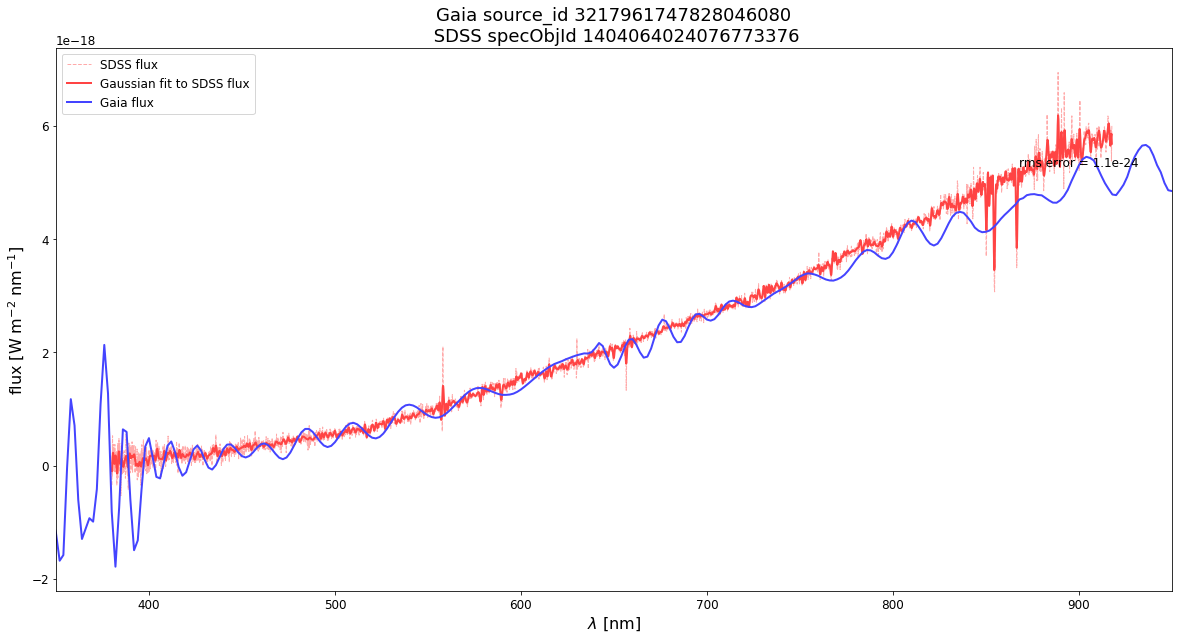

/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


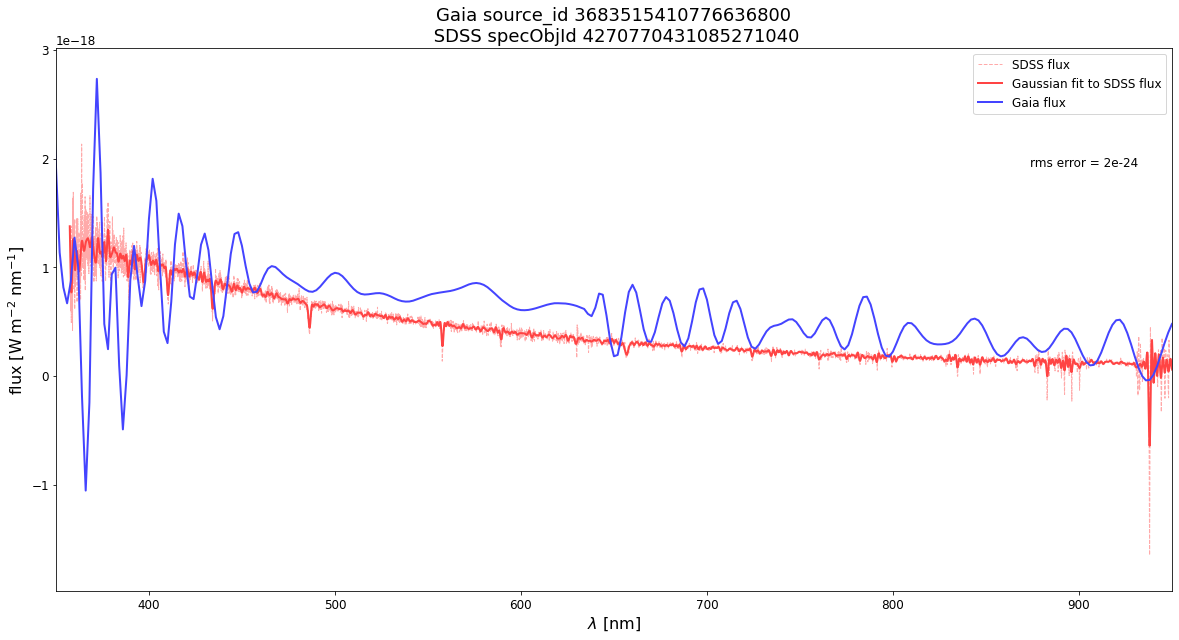

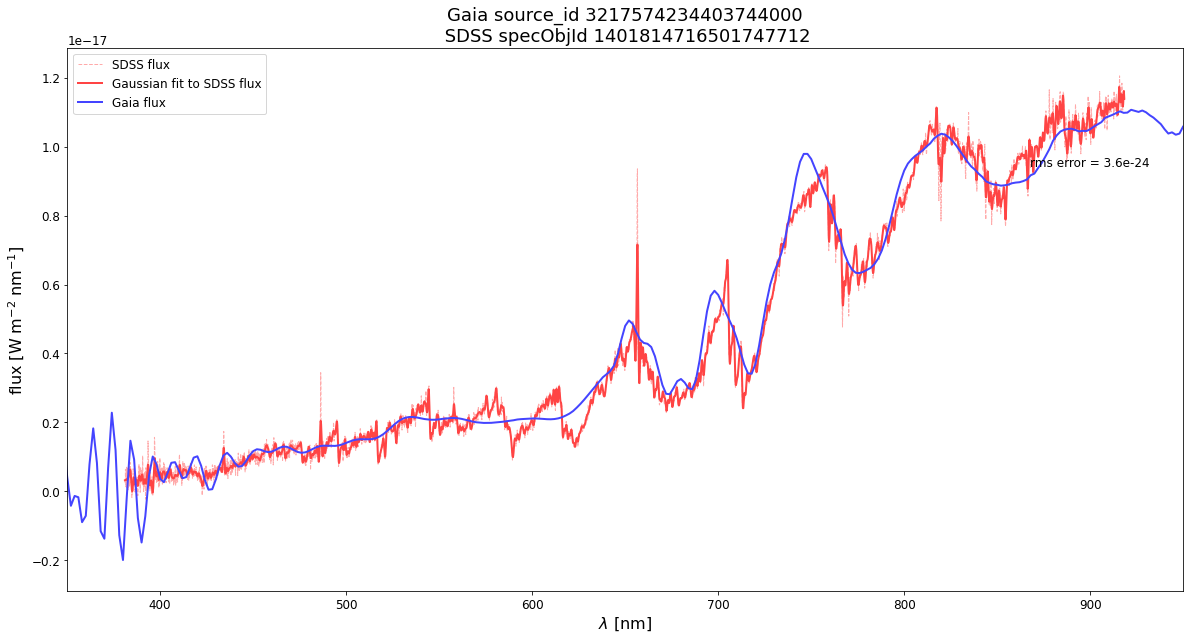

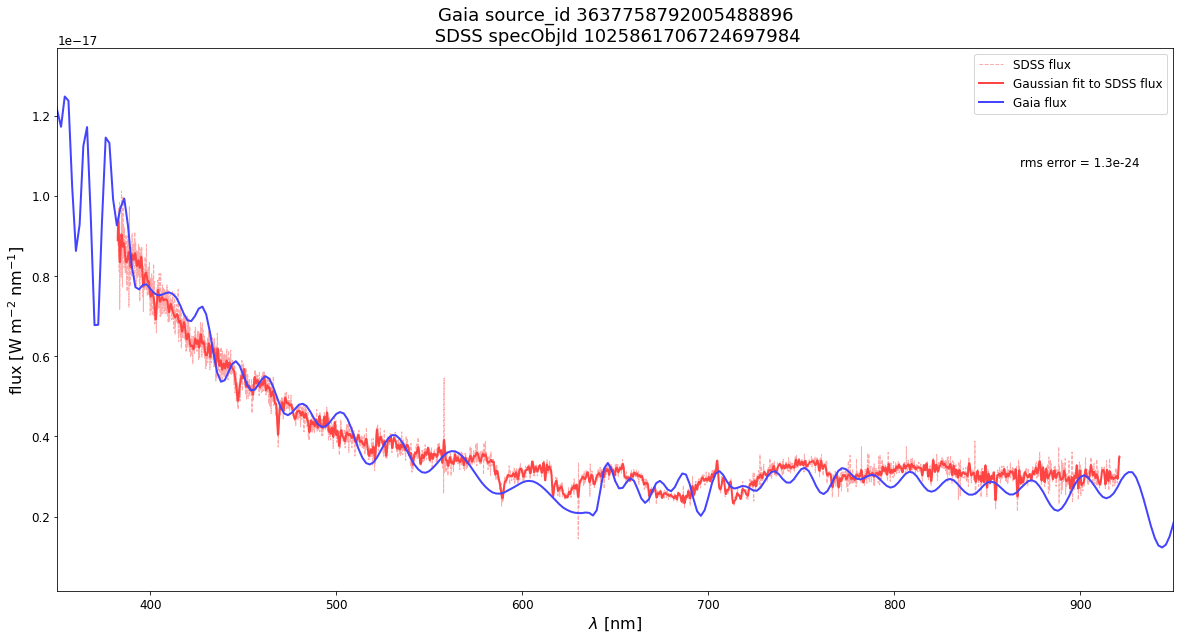

/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


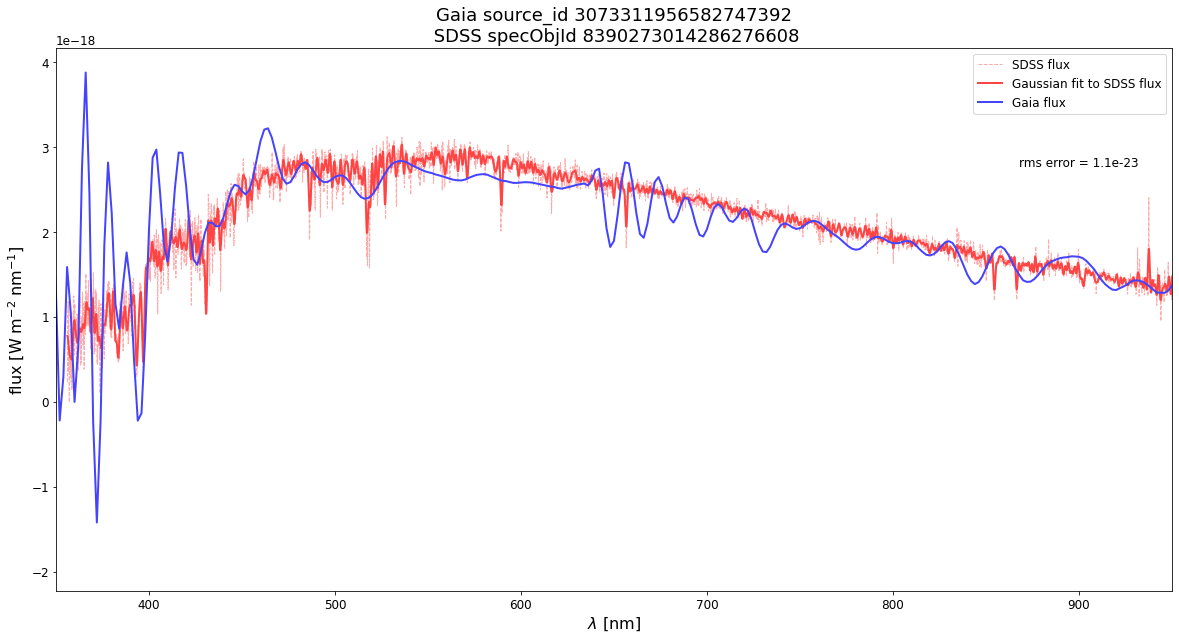

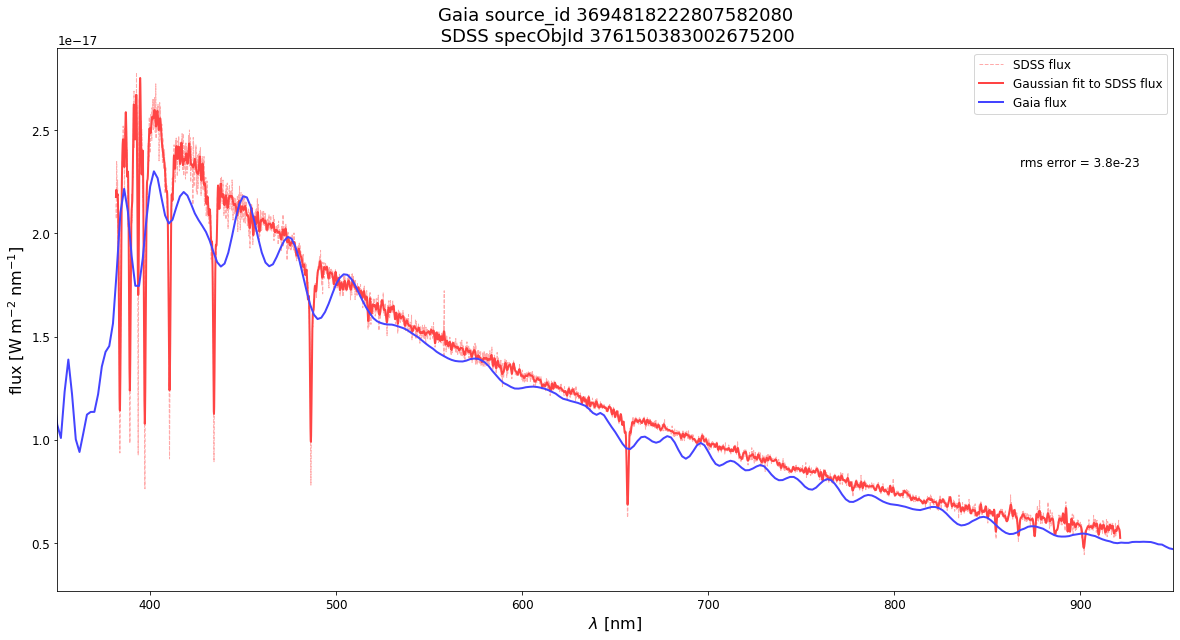

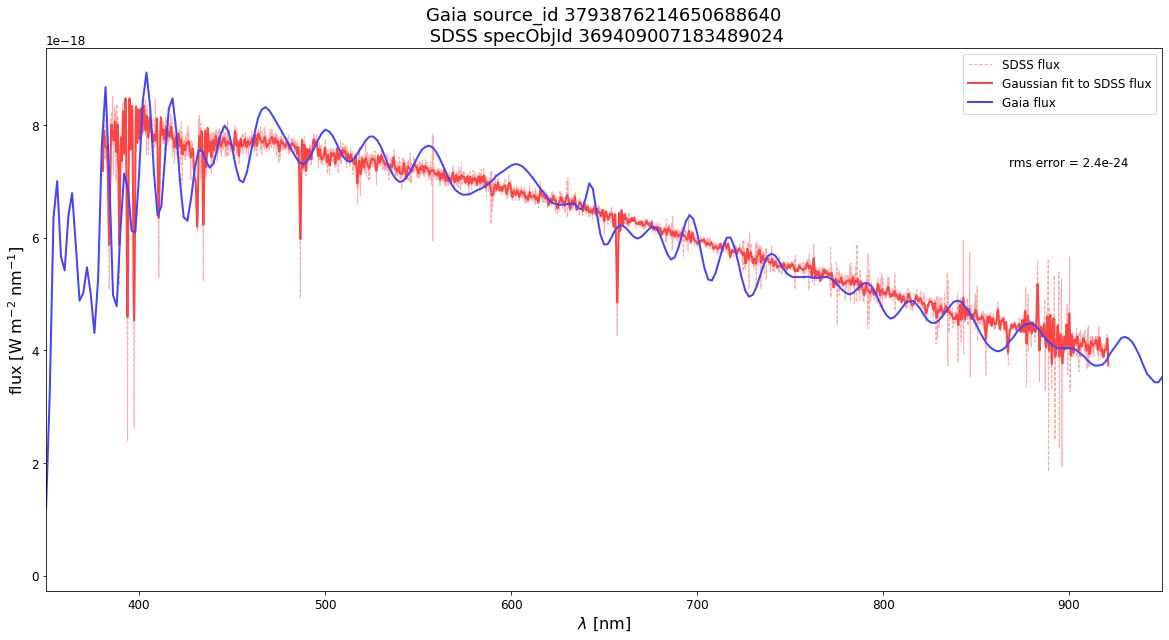

/home/noa/Data/radovi/gaia_sdss/venv/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.   0/1 [00:00<?, ?spec/s]
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


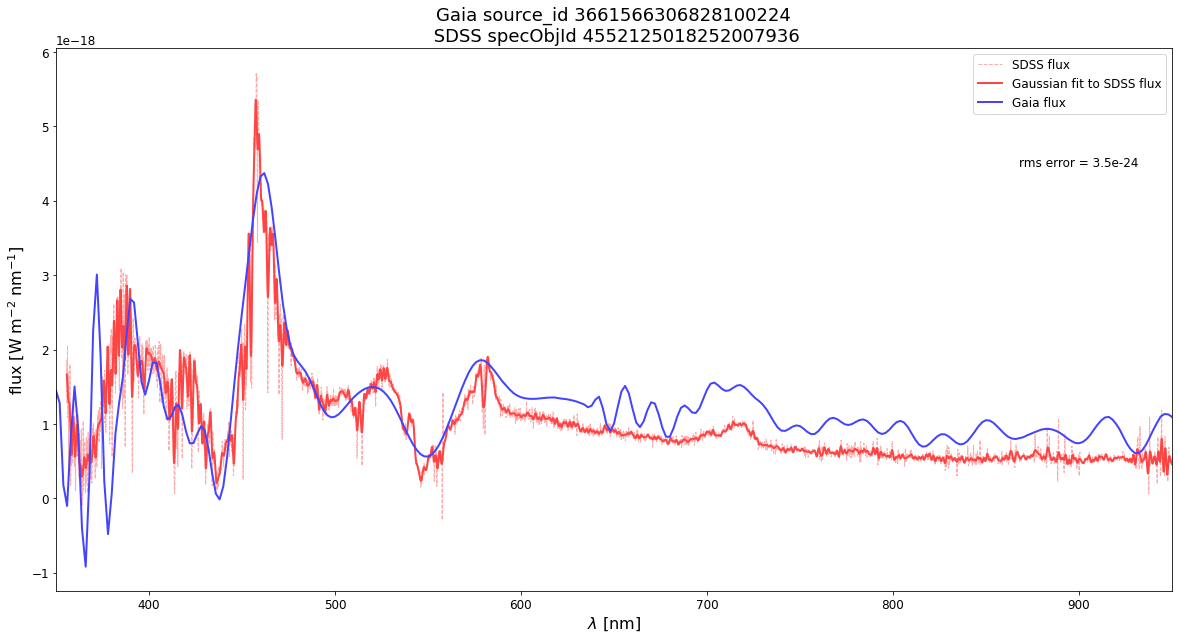

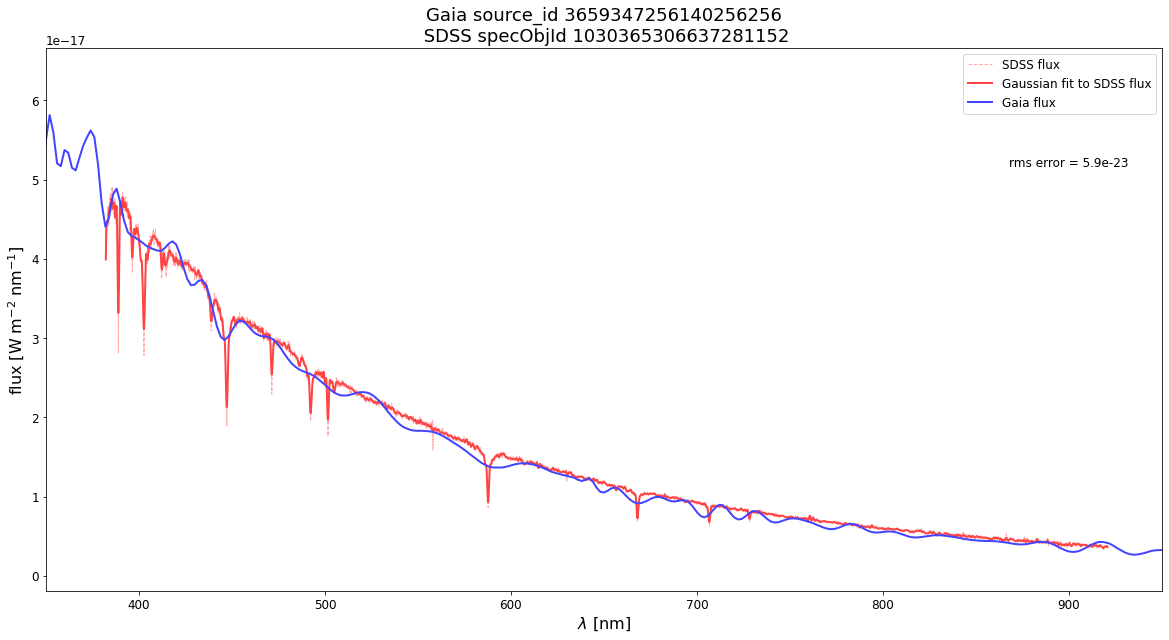

In [163]:
for gaia_id in DF[:20][GAIA_ID_COLNAME]:
    plot_gaia(gaia_id)

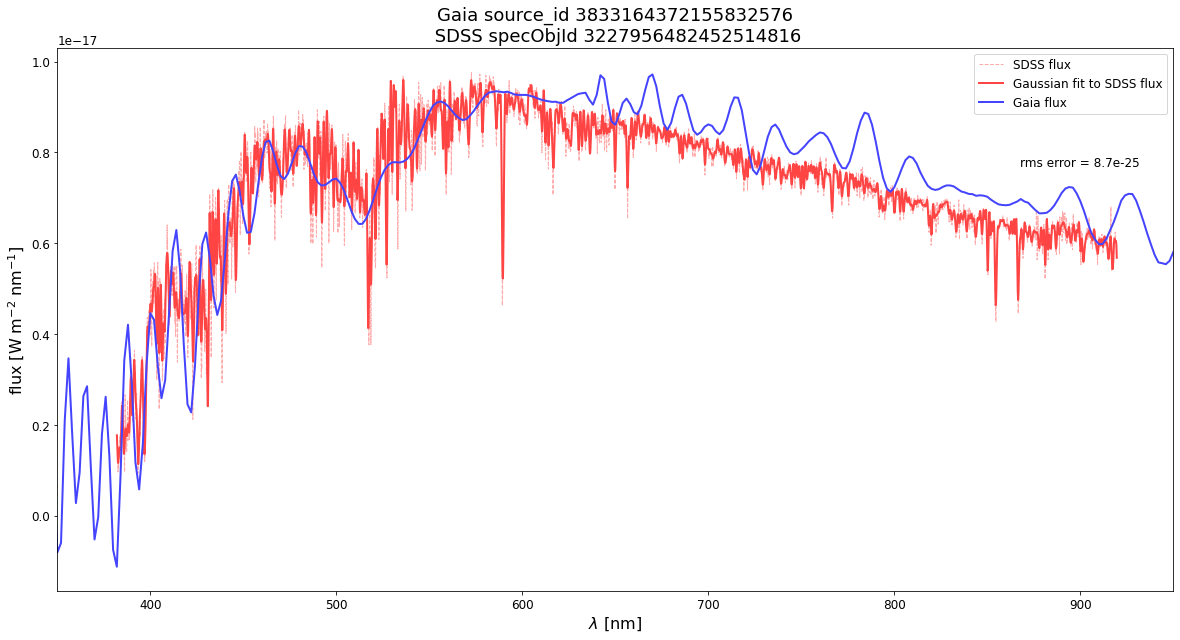

In [164]:
plot_gaia(3833164372155832576)